In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/brt/archive1.zip"

Archive:  /content/drive/MyDrive/brt/archive1.zip
  inflating: Br35H-Mask-RCNN/TEST/annotations_test.json  
  inflating: Br35H-Mask-RCNN/TEST/y701.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y702.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y703.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y704.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y705.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y706.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y707.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y708.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y709.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y710.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y711.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y712.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y713.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y714.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y715.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y716.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y717.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y718.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y719.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y72

In [ ]:
%matplotlib inline
from IPython import display
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import *
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import os
import keras
from keras.models import Sequential
#from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D ,MaxPooling2D,AveragePooling2D ,Flatten , Dense,Dropout,BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#LR,SVM,KNN

In [ ]:
data = []
category = []

In [ ]:
for filename in os.scandir("/content/no"):
    if filename.is_file():
        #print(filename.path)
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(0)
        del img

In [ ]:
for filename in os.scandir("/content/yes"):
    if filename.is_file():
        #print(filename.path)
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(1)
        del img

In [ ]:
x,y = np.array(data),category

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lg.score(x_train,y_train)

0.9911111111111112

In [ ]:
lg.score(x_test,y_test)

0.9633333333333334

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print('Confusion_Matrix:\n',confusion_matrix(y_test, y_pred))
print('\nClassification_report:\n',classification_report(y_test,y_pred))

Confusion_Matrix:
 [[126   6]
 [  5 163]]

Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       132
           1       0.96      0.97      0.97       168

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights="uniform",algorithm="auto")

In [ ]:

from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Validation score: {grid_search.best_score_}")

best_knn = grid_search.best_estimator_

Best hyperparameters: {'n_neighbors': 1}
Validation score: 0.9614814814814814


In [ ]:
y_pred = best_knn.predict(x_test)


In [ ]:
#knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#knn_model.score(x_train,y_train)

0.914074074074074

In [ ]:
#knn_model.score(x_test,y_test)

0.8766666666666667

In [ ]:
#y_pred = knn_model.predict(x_test)

In [ ]:
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy*100}")
print('Confusion_Matrix:\n',confusion_matrix(y_test, y_pred))
print('\nClassification_report:\n',classification_report(y_test,y_pred))

Accuracy: 97.0
Confusion_Matrix:
 [[129   3]
 [  6 162]]

Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.96      0.97       168

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
#Setting some inital parameters
height, width = 224, 224
batch_size=64

In [ ]:
data_dir = '/content/'

def image_generator(height,width):
    datagen = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.2,
            )
    train_ds = datagen.flow_from_directory(
            data_dir,
            batch_size=batch_size,
            subset="training",
            #color_mode = 'grayscale',
            shuffle=True,
            class_mode='binary',
            target_size=(height, width),
            classes={'no': 0., 'yes': 1.}
            )
    val_ds = datagen.flow_from_directory(
              data_dir,
              subset="validation",
              #seed=123,
              #color_mode = 'grayscale',
              class_mode='binary',
              target_size=(height, width),
              batch_size=batch_size,
            classes={'no': 0., 'yes': 1.}
            )
    return train_ds, val_ds

train_ds, val_ds = image_generator(height,width)

total_image = np.concatenate([train_ds.labels,val_ds.labels])
print('\n\n',{'No_brain_tumor_cases':len(np.where(total_image==0)[0]),
      'brain_tumor_cases':len(np.where(total_image==1)[0])})

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


 {'No_brain_tumor_cases': 1500, 'brain_tumor_cases': 1500}


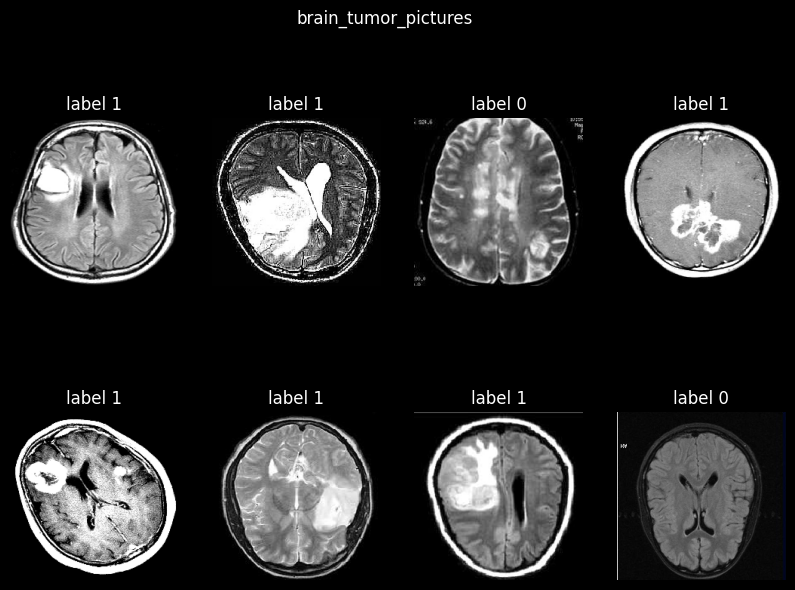

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(10, 7))
fig.suptitle("brain_tumor_pictures")
for k in range(8):
    images, labels = train_ds.next()

    i, j = k//4, k%4
    ax[i, j].imshow(images[0])
    ax[i, j].set_title(f'label {int(labels[0])}')
    ax[i, j].axis('off')
plt.show()

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

tf.keras.backend.clear_session()
input_shape = (height, width, 3)
base_model = tf.keras.applications.vgg19.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)
base_model.trainable = False

model_vgg19 = tf.keras.Sequential()
model_vgg19.add(base_model)
model_vgg19.add(tf.keras.layers.Flatten())

model_vgg19.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_vgg19.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['acc'])
model_vgg19.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg19_best.h5', monitor='acc', verbose=1, mode='max',save_best_only=True) #Callback to save the Keras model or model weights at some frequency.
early = tf.keras.callbacks.EarlyStopping(monitor="acc", mode="max",restore_best_weights=True, patience=5) # This early will stop the training when there is no improvement in
                                                                                                          # the loss for 5 consecutive epochs.
callbacks_list = [checkpoint,early]

history = model_vgg19.fit(
        train_ds,
        validation_data=val_ds,
        epochs=25,
        shuffle=True,
        verbose=True,
        callbacks=callbacks_list )

Epoch 1/25
38/38 [==============================] - ETA: 0s - loss: 2.4152 - acc: 0.7354
Epoch 1: acc improved from -inf to 0.73542, saving model to model/vgg19_best.h5
38/38 [==============================] - 39s 578ms/step - loss: 2.4152 - acc: 0.7354 - val_loss: 0.2855 - val_acc: 0.9117
Epoch 2/25
38/38 [==============================] - ETA: 0s - loss: 0.2209 - acc: 0.9262
Epoch 2: acc improved from 0.73542 to 0.92625, saving model to model/vgg19_best.h5
38/38 [==============================] - 15s 387ms/step - loss: 0.2209 - acc: 0.9262 - val_loss: 0.2475 - val_acc: 0.9117
Epoch 3/25
38/38 [==============================] - ETA: 0s - loss: 0.0927 - acc: 0.9638
Epoch 3: acc improved from 0.92625 to 0.96375, saving model to model/vgg19_best.h5
38/38 [==============================] - 15s 386ms/step - loss: 0.0927 - acc: 0.9638 - val_loss: 0.0394 - val_acc: 0.9867
Epoch 4/25
38/38 [==============================] - ETA: 0s - loss: 0.0477 - acc: 0.9842
Epoch 4: acc improved from 0.963

In [ ]:
train_result = model_vgg19.evaluate(train_ds)
val_result = model_vgg19.evaluate(val_ds)

no_augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
no_augmented_df

10/10 [==============================] - 3s 289ms/step - loss: 0.0232 - acc: 0.9883


,Train,Val
Loss,0.004727,0.023151
Acc,1.000000,0.988333


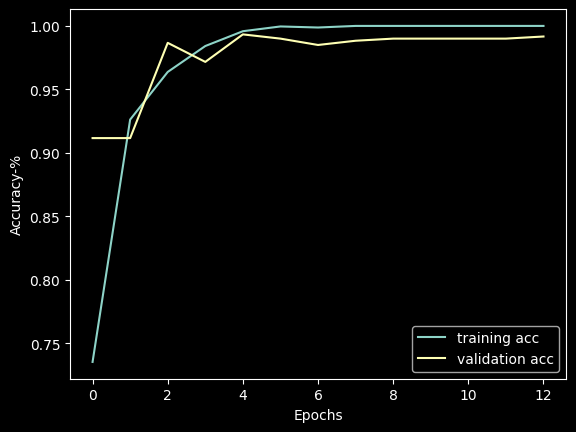

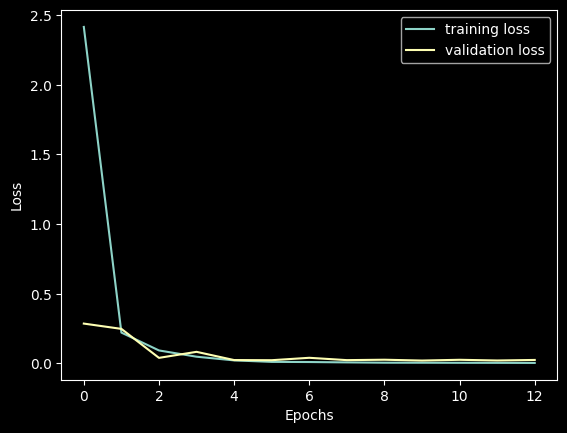

In [ ]:
def plot_learning_curve(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-%')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_learning_curve(history)

In [ ]:
def augmentataion_generator(height,width):
    datagen = ImageDataGenerator(
            rescale=1./255.,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            rotation_range=30,
            horizontal_flip=True,
            brightness_range=(0.5, 1.0)
            )
    aug_train_ds = datagen.flow_from_directory(
            data_dir,
            batch_size=64,
            shuffle=True,
            class_mode='binary',
            target_size=(height, width),
            classes={'no': 0., 'yes': 1.}
            )
    return aug_train_ds
aug_train_ds = augmentataion_generator(height,width)

Found 3000 images belonging to 2 classes.


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='acc', factor=0.3,
                              patience=2, min_lr=0.0000001)
callbacks_list = [checkpoint,reduce_lr]

history = model_vgg19.fit(
        aug_train_ds,
        validation_data=val_ds,
        epochs=25,
        verbose=True,
        callbacks=callbacks_list)

Epoch 1/25
47/47 [==============================] - ETA: 0s - loss: 1.8004 - acc: 0.7497
Epoch 1: acc did not improve from 1.00000
47/47 [==============================] - 57s 1s/step - loss: 1.8004 - acc: 0.7497 - val_loss: 1.1349 - val_acc: 0.7800 - lr: 0.0100
Epoch 2/25
47/47 [==============================] - ETA: 0s - loss: 0.5381 - acc: 0.8873
Epoch 2: acc did not improve from 1.00000
47/47 [==============================] - 52s 1s/step - loss: 0.5381 - acc: 0.8873 - val_loss: 0.1747 - val_acc: 0.9450 - lr: 0.0100
Epoch 3/25
47/47 [==============================] - ETA: 0s - loss: 0.4125 - acc: 0.8973
Epoch 3: acc did not improve from 1.00000
47/47 [==============================] - 52s 1s/step - loss: 0.4125 - acc: 0.8973 - val_loss: 0.0405 - val_acc: 0.9867 - lr: 0.0100
Epoch 4/25
47/47 [==============================] - ETA: 0s - loss: 0.3565 - acc: 0.9090
Epoch 4: acc did not improve from 1.00000
47/47 [==============================] - 61s 1s/step - loss: 0.3565 - acc: 0.909

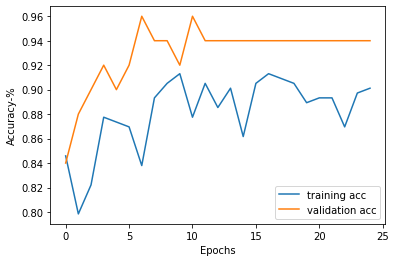

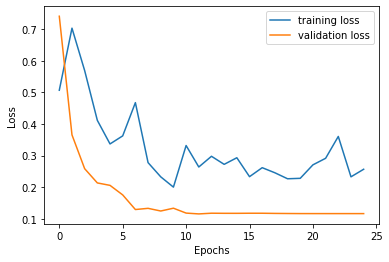

In [ ]:
plot_learning_curve(history)

In [ ]:
train_result = model_vgg19.evaluate(train_ds)
val_result = model_vgg19.evaluate(val_ds)

augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
augmented_df

10/10 [==============================] - 7s 722ms/step - loss: 0.0094 - acc: 0.9983


,Train,Val
Loss,0.017194,0.009394
Acc,0.993750,0.998333


In [ ]:
ypred_val = model_vgg19.predict(val_ds[0][0])
ypred_val = np.array([1 if x > 0.5 else 0 for x in ypred_val])
y_val = val_ds[0][-1]

print(confusion_matrix(y_val, ypred_val))
print('\n',classification_report(y_val,ypred_val))

2/2 [==============================] - 0s 200ms/step
[[31  0]
 [ 0 33]]

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [ ]:
height = 299
width = 299

train_ds, val_ds = image_generator(height,width)

tf.keras.backend.clear_session()
input_shape = (height, width, 3)
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)
base_model.trainable = False

model_inceptionv3 = tf.keras.Sequential()
model_inceptionv3.add(base_model)
model_inceptionv3.add(tf.keras.layers.Flatten())
model_inceptionv3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_inceptionv3.compile(
                    loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(0.001),
                    metrics=['acc']
)
model_inceptionv3.summary()

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1)                 131073    
                                                                 
Total params: 21,933,857
Trainable params: 131,073
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/inceptionv3_best.h5', monitor='acc', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="acc", mode="max",restore_best_weights=True, patience=5)
callbacks_list = [checkpoint,early]

history = model_inceptionv3.fit(
        train_ds,
        validation_data=val_ds,
        epochs=25,
        verbose=True,
        callbacks=callbacks_list)

Epoch 1/25
38/38 [==============================] - ETA: 0s - loss: 0.7520 - acc: 0.8729
Epoch 1: acc improved from -inf to 0.87292, saving model to model/inceptionv3_best.h5
38/38 [==============================] - 33s 633ms/step - loss: 0.7520 - acc: 0.8729 - val_loss: 0.1698 - val_acc: 0.9517
Epoch 2/25
38/38 [==============================] - ETA: 0s - loss: 0.1219 - acc: 0.9608
Epoch 2: acc improved from 0.87292 to 0.96083, saving model to model/inceptionv3_best.h5
38/38 [==============================] - 17s 447ms/step - loss: 0.1219 - acc: 0.9608 - val_loss: 0.0551 - val_acc: 0.9850
Epoch 3/25
38/38 [==============================] - ETA: 0s - loss: 0.0178 - acc: 0.9958
Epoch 3: acc improved from 0.96083 to 0.99583, saving model to model/inceptionv3_best.h5
38/38 [==============================] - 19s 500ms/step - loss: 0.0178 - acc: 0.9958 - val_loss: 0.0292 - val_acc: 0.9950
Epoch 4/25
38/38 [==============================] - ETA: 0s - loss: 0.0060 - acc: 0.9971
Epoch 4: acc i

In [ ]:
train_result = model_inceptionv3.evaluate(train_ds)
val_result = model_inceptionv3.evaluate(val_ds)

no_augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
no_augmented_df

10/10 [==============================] - 3s 295ms/step - loss: 0.0247 - acc: 0.9950


,Train,Val
Loss,0.000658,0.024675
Acc,1.000000,0.995000


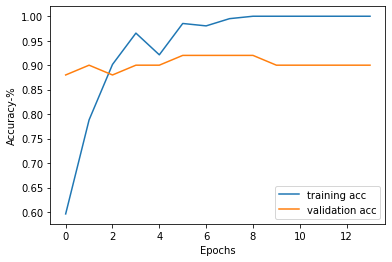

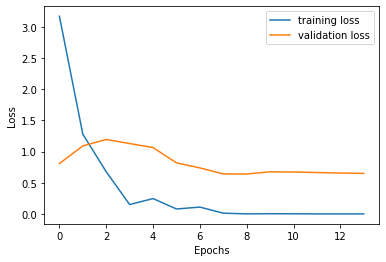

In [ ]:
plot_learning_curve(history)

In [ ]:
aug_train_ds = augmentataion_generator(height,width)

early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='acc', factor=0.3,
                              patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint,early,reduce_lr]

history = model_inceptionv3.fit(
        aug_train_ds,
        validation_data=val_ds,
        epochs=25,
        #shuffle=True,
        verbose=True,
        callbacks=callbacks_list)

Found 253 images belonging to 2 classes.
Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 1.3344 - acc: 0.8221
Epoch 1: acc did not improve from 1.00000
4/4 [==============================] - 9s 3s/step - loss: 1.3344 - acc: 0.8221 - val_loss: 1.2399 - val_acc: 0.8200 - lr: 0.0010
Epoch 2/25
4/4 [==============================] - ETA: 0s - loss: 1.1364 - acc: 0.8538
Epoch 2: acc did not improve from 1.00000
4/4 [==============================] - 6s 2s/step - loss: 1.1364 - acc: 0.8538 - val_loss: 0.3961 - val_acc: 0.8400 - lr: 0.0010
Epoch 3/25
4/4 [==============================] - ETA: 0s - loss: 0.6234 - acc: 0.8775
Epoch 3: acc did not improve from 1.00000
4/4 [==============================] - 6s 2s/step - loss: 0.6234 - acc: 0.8775 - val_loss: 0.1748 - val_acc: 0.9400 - lr: 0.0010
Epoch 4/25
4/4 [==============================] - ETA: 0s - loss: 0.5161 - acc: 0.8933
Epoch 4: acc did not improve from 1.00000
4/4 [==============================] - 6s 2s/step - loss

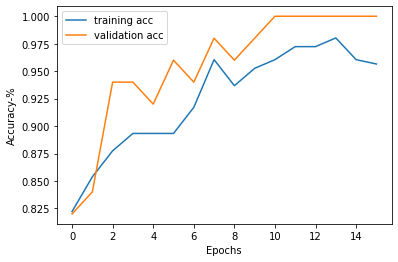

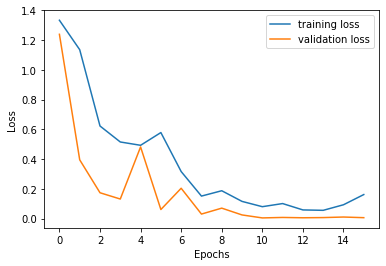

In [ ]:
plot_learning_curve(history)

In [ ]:
train_result = model_inceptionv3.evaluate(train_ds)
val_result = model_inceptionv3.evaluate(val_ds)

augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
augmented_df

1/1 [==============================] - 0s 358ms/step - loss: 0.0056 - acc: 1.0000


,Train,Val
Loss,0.000453,0.005582
Acc,1.000000,1.000000


In [ ]:
ypred = model_inceptionv3.predict(val_ds[0][0])
ypred = np.array([1 if x > 0.5 else 0 for x in ypred])
#ypred = ypred.astype(int)
ytest = val_ds[0][-1]

print('Confusion_Matrix:\n',confusion_matrix(ytest, ypred))
print('\nClassification_report:\n',classification_report(ytest,ypred))

2/2 [==============================] - 5s 2s/step
Confusion_Matrix:
 [[19  0]
 [ 0 31]]

Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



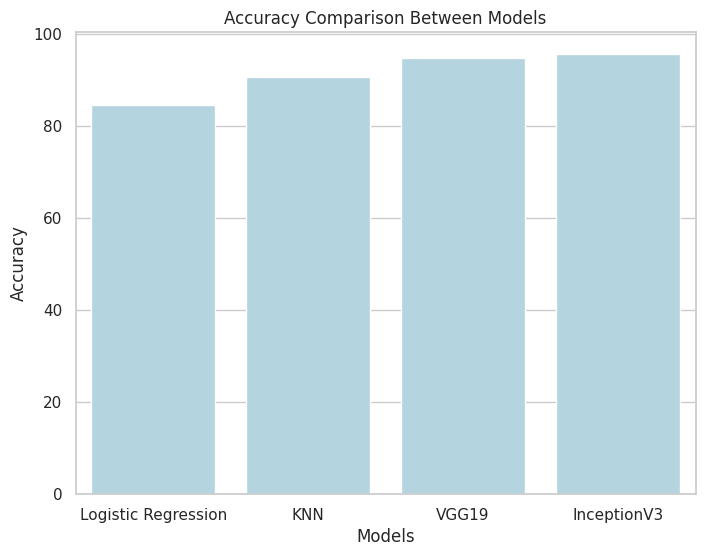

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'VGG19', 'InceptionV3']
accuracies = [84.66, 90.66, 94.86, 95.68]

# Create a barplot using Seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=models, y=accuracies, color='lightblue')

# Add axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Between Models')

plt.show()


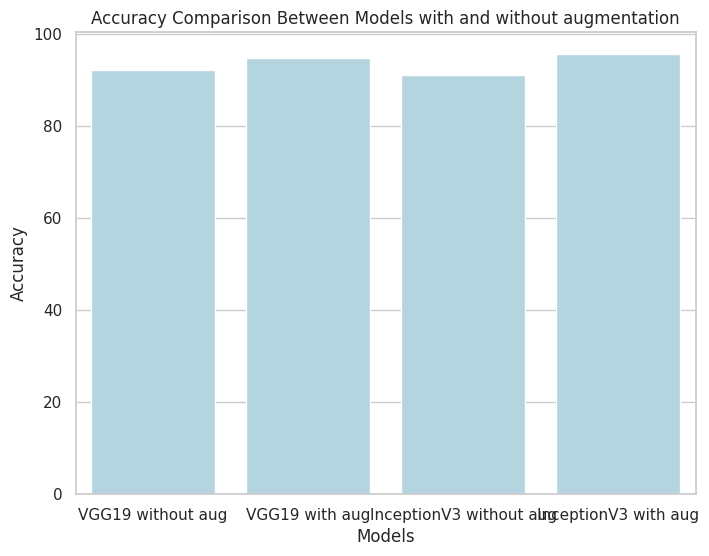

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['VGG19 without aug', 'VGG19 with aug', 'InceptionV3 without aug', 'InceptionV3 with aug']
accuracies = [92.17, 94.86, 91.16, 95.68]

# Create a barplot using Seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=models, y=accuracies, color='lightblue')

# Add axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Between Models with and without augmentation')

plt.show()


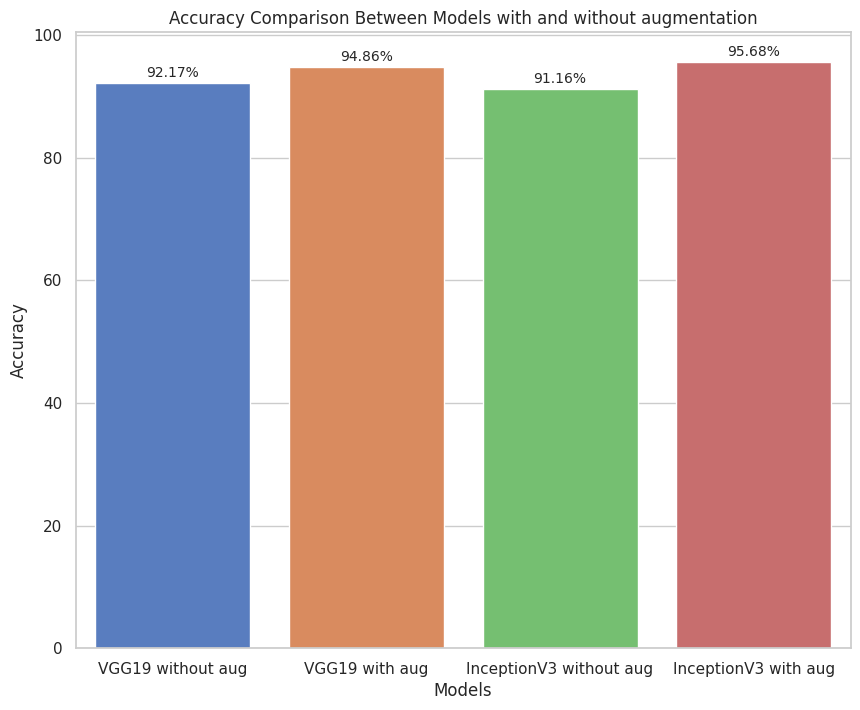

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['VGG19 without aug', 'VGG19 with aug', 'InceptionV3 without aug', 'InceptionV3 with aug']
accuracies = [92.17, 94.86, 91.16, 95.68]

# Create a barplot using Seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=models, y=accuracies, palette='muted')

# Add axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Between Models with and without augmentation')

# Add labels to the bars
for i, v in enumerate(accuracies):
    ax.text(i, v+1, "{:.2f}%".format(v), ha='center', fontsize=10)

plt.show()
